# **${\Large\text{Criptografía 2024-10 - Proyecto 2}}$**

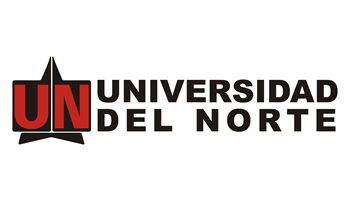

---

## **Nombre y Códigos de los Estudiantes:**
- Katy Diaz - 200142505
- Jesús Durán - 200143829
- Mariana Oquendo - 200082252
- Leonardo Vaia - 200212652

## **Indicaciones:**

1. **El proyecto debe ser entregado a más tardar a las 11:59 p.m. del domingo 12 de mayo del 2024**, después de esto el enlace para enviar el proyecto se cerrará. Asegúrese de enviar el proyecto antes de la hora de finalización, no se aceptarán proyectos enviados por ningún otro medio.
2. El proyecto debe ser realizado en equipos de **4 integrantes**.
3. Cree una copia de este archivo de Google Colab.
4. Utilice la librería `pycryptodome` para el desarrollo del proyecto.
  - Puede instalarla ejecutando el siguiente código en una celda del archivo de Google Colab: `!pip install pycryptodome`.
5. Únicamente envíe el cuaderno de Jupyter con los códigos, las respuestas y el informe correspondiente.

## **Enunciado:**
El objetivo de este proyecto es intentar recuperar una serie de contraseñas que han sido almacenadas de manera segura utilizando 4 protocolos diferentes listados a continuación:
1. Protocolo de almacenamiento de contraseñas versión 1.
   - Se almacena `(username, H(password))`.
2. Protocolo de almacenamiento de contraseñas versión 2.
   - Se almacena `(username, salt, H(password || salt))`.
3. Protocolo de almacenamiento de contraseñas versión 3.
   - Se almacena `(username, salt, H(password || pepper || salt))`.
     - El tamaño de `pepper` es 16 bits.
4. Protocolo de almacenamiento de contraseñas utilizando una PBKDF.
   - Se almacena `(username, salt, PBKDF(password, salt, 64, 2 ** 20, H))`.
     - `64` es el número de bytes que se obtentrán de la función `PBKDF`.
     - `2 ** 20` es la dificultad `d` de la función `PBKDF`.

En todos los escenarios anteriores la función hash `H` utilizada fue `SHA3_512` de `Crypto.Hash`. Para el último escenario la función PBKDF utilizada fue `PBKDF2` de `Crypto.Protocol.KDF`.

En cada escenario deberán obtener la contraseña para cada uno de los integrantes del grupo de trabajo utilizando como identificador el usuario Uninorte. Para ello, deberán utilizar el **archivo de contraseñas comunes** ([rockyou.txt](https://www.kaggle.com/datasets/wjburns/common-password-list-rockyoutxt)) provisto y la base de datos (archivo de contraseñas) correspondiente.

Se recomienda paralelizar el proceso de búsqueda de contraseñas para reducir el tiempo de ejecución.

Finalmente, se debe realizar un informe (puede ser en el mismo Jupyter Notebook / Google Colab) dónde:
1. Se expliquen los métodos / estrategias utilizados para obtener las contraseñas originales.
2. Se realice un análisis de los tiempos de ejecución de los métodos propuestos para la recuperación de las contraseñas.
3. Se realice un breve análisis de seguridad de los protocolos, contra un atacante que se robe la base de datos de las contraseñas. Adicionalmente, mencione cuál(es) protocolo(s) utilizaria usted para la protección de las contraseñas y por qué.
4. Se exponga y justifique los contratiempos y motivos en caso de no recuperar alguna de las contraseñas originales.

## **Caso 1 (Protocolo V.1):**

In [1]:
filename = 'password_database_v1.csv'

In [2]:
from Crypto.Hash import SHA3_512

In [3]:
import pandas as pd
import numpy as np

df_hash = pd.read_csv(filename)


In [4]:
usernames = ['lvaia', 'jdiazk','dcardenasj']

In [5]:
# get from the df_hash the row with the username contained in the list usernames
rows = []
hashes = []
i = 0
for username in usernames:
    rows.append(df_hash[df_hash['username'] == username])
    hashes.append(rows[i]['password'].values[0])
    i = i + 1


In [6]:
print(hash)

<built-in function hash>


In [7]:
def hash_password(password,hash_to_compare):
    h = SHA3_512.new()
    h.update(password.encode())
    tmp = h.hexdigest()
    if tmp == hash_to_compare:
        print('Password correct')
        print('Password: ',password)
        return tmp
    pass


In [8]:
with open('rockyou.txt', 'r', encoding='latin-1') as file:
    passwords = file.readlines()
    passwords = [password.strip() for password in passwords]


In [9]:
print(passwords[:20])

['123456', '12345', '123456789', 'password', 'iloveyou', 'princess', '1234567', 'rockyou', '12345678', 'abc123', 'nicole', 'daniel', 'babygirl', 'monkey', 'lovely', 'jessica', '654321', 'michael', 'ashley', 'qwerty']


In [10]:
import hashing
hashing.hash_passwords(passwords,rows,hashes)

Hashing passwords
Number of passwords:  14344391
Password correct for row:  lvaia
Password:  LASING
Password correct for row:  jdiazk
Password:  knd0429
Password correct for row:  dcardenasj
Password:  156gpvadbxs


['LASING', 'knd0429', '156gpvadbxs']

## **Caso 2 (Protocolo V.2):**

In [11]:
filename = './password_database_v2.csv'

In [12]:
df_hash = pd.read_csv(filename)

In [13]:
# get from the df_hash the row with the username contained in the list usernames
rows = []
hashes = []
salts = []
i = 0
for username in usernames:
    rows.append(df_hash[df_hash['username'] == username])
    hashes.append(rows[i]['password'].values[0])
    salts.append(bytes.fromhex(rows[i]['salt'].values[0]))
    i = i + 1
print(hashes)
print(salts)


['cb83afb5bb4291c635a8ce8e2ea0e5bca2b6dde3f89e2b57ec035a29dba8d7f31fd472e31d65e2db31c8a020bf7ab025e5fa166474b357b8d9e4dc801dc09761', 'bdf92ac37348354bdabba7252ad92ca110a23f6a93eed173c9e00a8a1e9ccace2e6f7546a97063ec37aae0bd12a268f4cdb35fcdf9d07d7ad1199feaa0cd4fed', '16147dce8e349c25f05c687e79b05319875f1b492dc67ef85a8b6d8b1a7e66d762834e0e8b664a5c0fe3b0fb2de2a456957caafea40a2c710e7e7435610dd585']
[b'\x9b]{\x19\xf5i%T\xcc$p\x93A\xfc\xcch', b'T\x87D7\x1c2f\xa4\xcf\xe9X \xc5\x8a\xde\xfa', b'\xa3\xae\xd8\x9d\xd5\xa5\xa8\xc6\x9eA$\xd1n\x14\x81\x9f']


In [21]:
for row in rows:
    row['salt'] = bytes.fromhex(row['salt'].values[0])

/var/folders/x5/spm_6r5944dfgx3qj8my0m440000gn/T/ipykernel_24600/2704734641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['salt'] = bytes.fromhex(row['salt'].values[0])


In [23]:
import hashing_2
hashing_2.hash_passwords(passwords,rows)

Hashing passwords
Number of passwords:  14344391
['cb83afb5bb4291c635a8ce8e2ea0e5bca2b6dde3f89e2b57ec035a29dba8d7f31fd472e31d65e2db31c8a020bf7ab025e5fa166474b357b8d9e4dc801dc09761', 'bdf92ac37348354bdabba7252ad92ca110a23f6a93eed173c9e00a8a1e9ccace2e6f7546a97063ec37aae0bd12a268f4cdb35fcdf9d07d7ad1199feaa0cd4fed', '16147dce8e349c25f05c687e79b05319875f1b492dc67ef85a8b6d8b1a7e66d762834e0e8b664a5c0fe3b0fb2de2a456957caafea40a2c710e7e7435610dd585']
Password correct for username:  dcardenasj
Password:  jean76
Password correct for username:  lvaia
Password:  st1nkp0t
Password correct for username:  jdiazk
Password:  TuggyBug!


['jean76', 'st1nkp0t', 'TuggyBug!']

## **Caso 3 (Protocolo V.3):**

In [ ]:
filename = './password_database_v3.csv'

## **Caso 4 (Protocolo V.PBKDF):**

In [24]:
filename = './password_database_vPBKDF.csv'

In [25]:
df_hash = pd.read_csv(filename)

In [26]:
# get from the df_hash the row with the username contained in the list usernames
rows = []
hashes = []
i = 0
for username in usernames:
    rows.append(df_hash[df_hash['username'] == username])
    hashes.append(rows[i]['password'].values[0])
    i = i + 1
print(hashes)

['1dd75ef5ccf20858fb87c02dbaf8ebb97bcb5473469e0863afb5c535150b2b7878609abfe22f3425cf5b650bd38dbc8baff74149c29842018837f84ac96480c3', '25c77732faa1ec75b9eb19e187bd0e32704d55fe4ad86c86d6477027f5b8a6ce0a4d132d68dde56036ed0af5c8ce0ede4d82fe20682c809abadf07db6b988fb8', 'b163a1bcf0d94fa8fb44c1c21ac4738499b8e9369cdfcf3f0d1bdda3b3fdc521455bac25c645ff805cfdc26a25cd13d47a0fdec17729fa5a6ff9686363d2acc2']


In [27]:
import hashing_4
hashing_4.hash_passwords(passwords,rows)

Hashing passwords
Number of passwords:  14344391
0
0
0
0
0
0
0
60
80
120
140
200
240
320
340
380
400


KeyboardInterrupt: 

it computes 400 different password each minute, so it will try all of them in more or less 20 days

## Informe

En el siguiente informe se enunciarán los métodos/estrategias utilizadas, para el desarrollo del proyecto, así como los análisis de tiempo de ejecución en cada uno de los casos y un análisis de seguridad de los métodos implementados.
En primer lugar, el código se desarrolló en 4 etapas: búsqueda de contraseñas comunes, en esta etapa se utilizó una lista de contraseñas del archivo "rockyou.txt"; Uso de la técnica salting para mejorar la seguridad de las contraseñas almacenadas, en tercer lugar, se hace una comparación de contraseñas seguras, de modo que se concatena la contaseña junto con la salt y el pepper, y luego se calcula el hash, y en ultimo lugar, se hace uso de las funciones hash seguras tal como la función SHA3_512, esto con el fin de garantizar que los hashes sean resistentes a las colisiones.
Con respecto a los análisis de tiempo tenemos que:

hemos utilizado archivos py mas esto notebook por el desarollo del proyecto porque la paralelizacion funciona mucho mejor asi,

 #### Caso 1:
-Tiempo de ejecución: 40 segundos.
En este caso se infiere que el método utilizado es eficiente, esto debido a la efectividad y rápidez con la cual se ejecutó el código. Es probable que esto se deba a la ausencia de la salt y/u otros factores que aumenten la complejidad de calculo del hash.
#### Caso 2:
-Tiempo de ejecución: 42 segundos.
Al igual que el caso 1 este no tiene un tiempo de ejecución muy largo, aunque se hace uso de la "salt" para aumentar la seguridad, no parece afectar siginificativamente el tiempo de ejecución en comparación con el caso 1.
#### Caso 3:
-Tiempo estimado de ejecución: 50 días.
Este caso no alcazó a ejecutarse debido al tiempo estimado de ejecución, ya que este en comparación con los dos anteriores es notablemente mucho mas largo. Se supone que esto se debe a la introducción de un valor "pepper" el cual aumentaría la complejidad del cálculo hash, porque el calculo va a ser lo mismo del caso 2 pero moltiplicado por 2^16 veces entonces va a ser un tempo de ejecucion de mas o menos de 50 dias con este algoritmo.
#### Caso 4:
-Tiempo estimado de ejecución: 25 días.
Aunque el tiempo de ejecución de este método es más corto que el del Caso 3, con 25 días sigue siendo largo. Sin embargo, en este se analizan 400 contraseñas por minuto, lo cual indica que este método puede ser más eficiente en términos de velocidad de procesamiento en comparación con el Caso 3.

#### Conclusion
En conclusión, os Casos 1 y 2, que no incorporan el uso de sal, demostraron ser los más eficientes en términos de velocidad de procesamiento. Esto se atribuye a la ausencia de factores adicionales que aumenten la complejidad del cálculo del hash. Sin embargo, aunque el Caso 2 incorpora la sal en su enfoque, su tiempo de ejecución sigue siendo comparable al del Caso 1. Por otro lado, el Caso 3, que introduce el concepto de 'pepper' en el almacenamiento de contraseñas, mostró un tiempo de ejecución significativamente más largo en comparación con los Casos 1 y 2. La inclusión del 'pepper' añade una capa adicional de complejidad al cálculo del hash, lo que resulta en un proceso más lento y prolongado. mientras el Caso 4, que implementa una función de derivación de clave basada en contraseña (PBKDF), exhibió un tiempo de ejecución considerablemente largo, pero con la capacidad de analizar un gran número de contraseñas por minuto. Esto sugiere que, a pesar de su prolongado tiempo de ejecución absoluto, el enfoque utilizado en el Caso 4 permite una mayor eficiencia en términos de procesamiento de contraseñas a gran escala.
En resumen, los resultados del análisis de tiempo de ejecución, revelan que la inclusión de factores adicionales como la sal y el 'pepper' aumenta significativamente la complejidad del proceso de cálculo del hash, lo que se traduce en tiempos de ejecución más largos. En cambio, los métodos que no incorporan tales factores muestran tiempos de ejecución más cortos pero potencialmente comprometen la seguridad de las contraseñas almacenadas. Estos hallazgos destacan la importancia de encontrar un equilibrio entre la seguridad y la eficiencia en la implementación de protocolos de almacenamiento de contraseñas.
Por otro lado, para abordar el análisis de seguridad frente a un posible robo de la base de datos de contraseñas, es esencial evaluar la capacidad de cada protocolo para proteger las contraseñas almacenadas. Los Casos 1 y 2, al carecer de pepper, serían más vulnerables a ataques de fuerza bruta y diccionario en caso de una brecha de seguridad, en el Caso 3, con la inclusión del "pepper", proporciona una capa adicional de seguridad al introducir un factor adicional de aleatorización en el cálculo del hash. Sin embargo, su largo tiempo de ejecución podría ser una preocupación en términos de eficiencia. Por otro lado, el Caso 4, a pesar de su largo tiempo de ejecución, podría ofrecer una mayor protección debido a la implementación de la función PBKDF, que está diseñada específicamente para hacer frente a ataques de fuerza bruta. En este sentido, consideraría utilizar el Caso 4 para la protección de contraseñas debido a su mayor resistencia frente a ataques, a pesar de su tiempo de ejecución más largo.
Durante el proceso de recuperación de las contraseñas, nos enfrentamos a diversos contratiempos que afectaron significativamente nuestra capacidad para recuperar todas las llaves originales. Uno de los principales obstáculos que encontramos fue la organización del tiempo y la no optimización del algoritmo, lo cual no nos permitió la recuperación en los caso 3 y 4. Aunque inicialmente y por la falta de tiempo optamos por este enfoque, en retrospectiva reconocemos que no fue la mejor decisión.